In [ ]:
#前回と同じ＋α　使わないものもインポートしてます
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
from pandas import DataFrame
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing


model = LinearRegression()
pdata= pd.read_csv('/content/drive/My Drive/precure_datasets.csv', sep=",")
x = pdata.drop(['Fall Movies Sales(million)','name'], axis=1) #x=名前と秋映画興行収入を除いたデータ
y = pdata[["Fall Movies Sales(million)"]] #y=秋映画興行収入


Mounted at /content/drive


<class 'seaborn.axisgrid.PairGrid'>


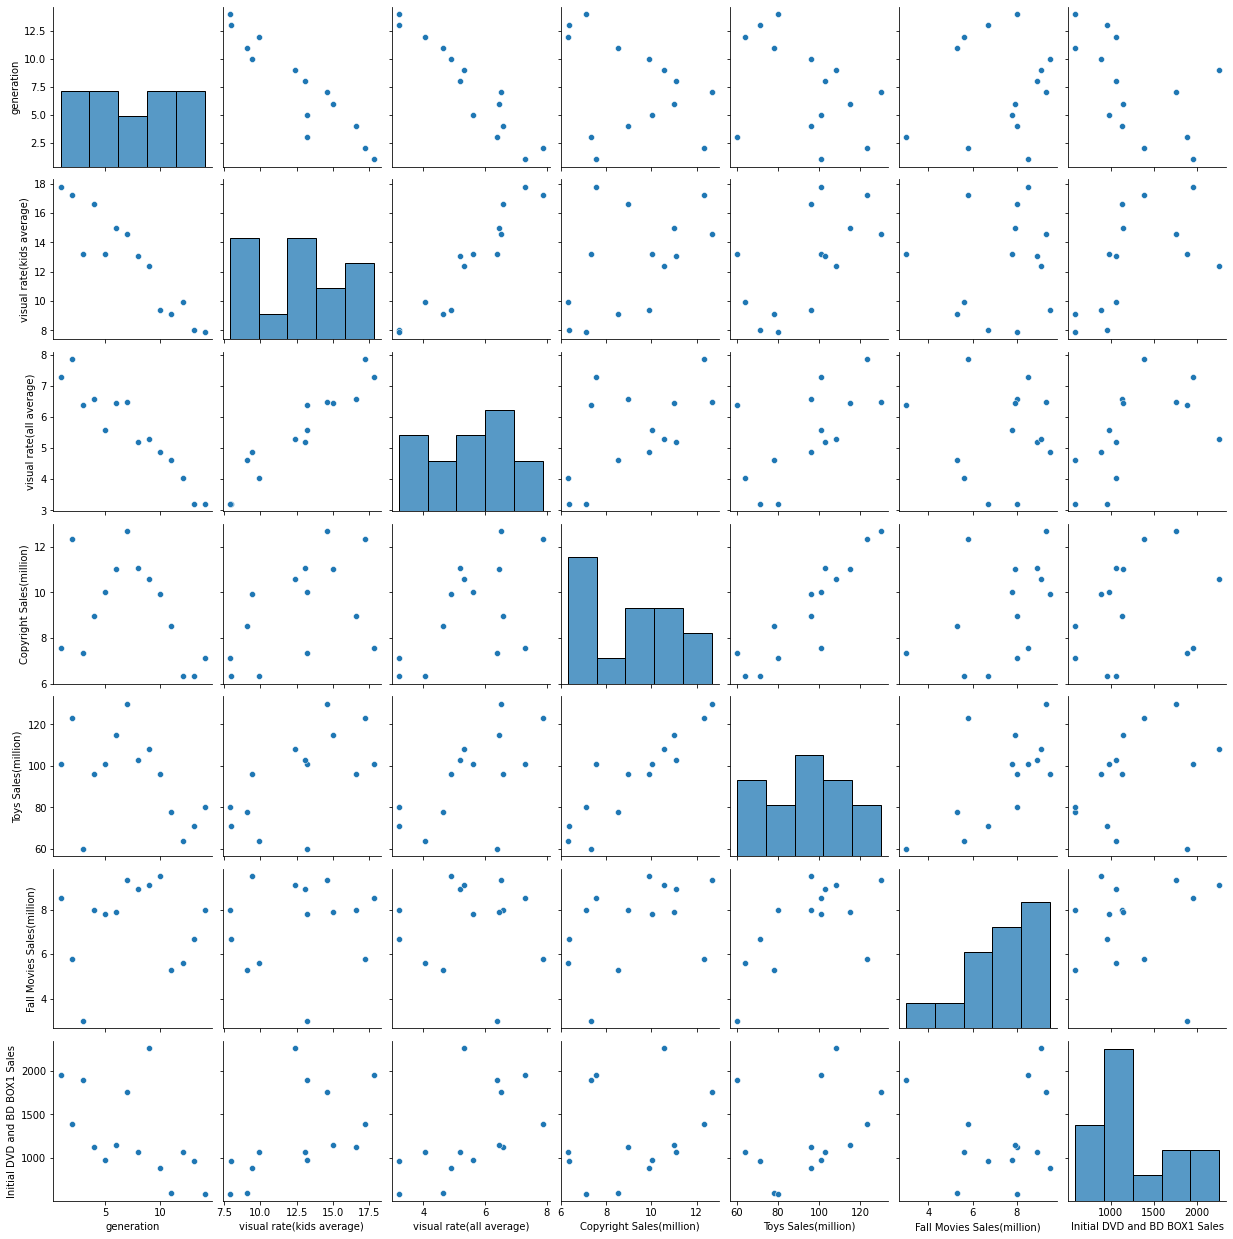

In [ ]:
pg = sns.pairplot(pdata)
print(type(pg))

In [ ]:
pdata.describe #データののぞき見

<bound method NDFrame.describe of     generation       name  visual rate(kids average)  \
0            1  the first                       17.8   
1            2         mh                       17.2   
2            3         ss                       13.2   
3            4       five                       16.6   
4            5         go                       13.2   
5            6      fresh                       15.0   
6            7         hc                       14.6   
7            8      sweet                       13.1   
8            9      smile                       12.4   
9           10   dokidoki                        9.4   
10          11  happiness                        9.1   
11          12   princess                        9.9   
12          13    magical                        8.0   
13          14   kirakira                        7.9   

    visual rate(all average)  Copyright Sales(million)  Toys Sales(million)  \
0                       7.29                  

In [ ]:
print(x)

    generation  visual rate(kids average)  visual rate(all average)  \
0            1                       17.8                      7.29   
1            2                       17.2                      7.87   
2            3                       13.2                      6.38   
3            4                       16.6                      6.58   
4            5                       13.2                      5.60   
5            6                       15.0                      6.46   
6            7                       14.6                      6.50   
7            8                       13.1                      5.20   
8            9                       12.4                      5.30   
9           10                        9.4                      4.88   
10          11                        9.1                      4.62   
11          12                        9.9                      4.05   
12          13                        8.0                      3.20   
13    

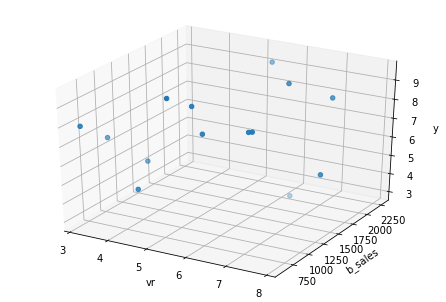

In [ ]:
#まず２個でやってみる


fig=plt.figure()
ax=Axes3D(fig)

vr = pdata[["visual rate(all average)"]] #VR=x1
b_sales = pdata[["Initial DVD and BD BOX1 Sales"]] #X2
x1 = pdata[["visual rate(all average)","Initial DVD and BD BOX1 Sales"]] # x1とx2をまとめた説明変数

"""
x1に説明変数の全体
ｙは秋の映画のやつ
"""

ax.scatter3D(vr, b_sales, y)
ax.set_xlabel("vr")
ax.set_ylabel("b_sales")
ax.set_zlabel("y")

#一旦，図示
plt.show()

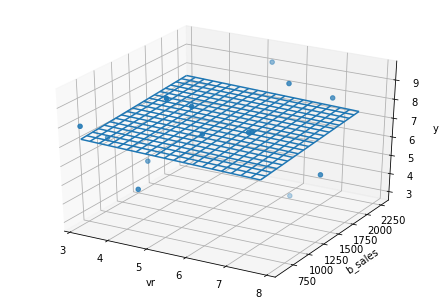

偏回帰係数
[[-0.0603068   0.00028523]]

切片
[7.35810324]

決定係数
0.00415719595117281


In [ ]:
model_lr = LinearRegression()
model_lr.fit(x1, y)

fig=plt.figure()
ax=Axes3D(fig)

ax.scatter3D(vr, b_sales, y)
ax.set_xlabel("vr")
ax.set_ylabel("b_sales")
ax.set_zlabel("y")

#minmaxスケーリング
mesh_x1 = np.arange(vr.min()[0], vr.max()[0], (vr.max()[0]-vr.min()[0])/20)
mesh_x2 = np.arange(b_sales.min()[0], b_sales.max()[0], (b_sales.max()[0]-b_sales.min()[0])/20)
mesh_x1, mesh_x2 = np.meshgrid(mesh_x1, mesh_x2)
mesh_y = model_lr.coef_[0][0] * mesh_x1 + model_lr.coef_[0][1] * mesh_x2 + model_lr.intercept_[0]
ax.plot_wireframe(mesh_x1, mesh_x2, mesh_y)
plt.show()

print("偏回帰係数")
print(model_lr.coef_)
print("\n切片")
print(model_lr.intercept_)
print("\n決定係数")
print(model_lr.score(x1, y))

秋の映画興行収入＝-0.0603×vr + 0.000285×b_sales + 7.358


決定係数は当てはまり具合です．手元のデータが少ないので仕方ないですねここら辺は次回以降にまた書きます

In [ ]:
#本題に行きます．,yについては上で定義してしまいましたすみません

model.fit(x, y)
keisuu = model.coef_
seppenn = model.intercept_

print("偏回帰係数")
print(keisuu)
print("\n切片")
print(seppenn)

偏回帰係数
[[-2.59112113e-01  1.18640432e-01 -1.97397805e+00 -4.07974866e-01
   1.37125495e-01  3.44484103e-04]]

切片
[9.06077962]
